## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [137]:
diabetes_data = pd.read_csv(r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\GridSearch KNN case study\data\diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [138]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [139]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [140]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**<font color='teal'> Plot histograms of each column. </font>**

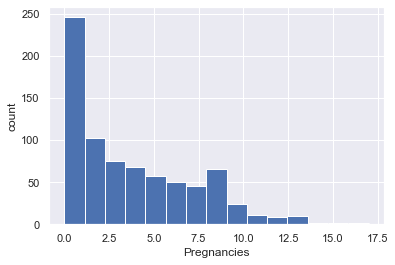

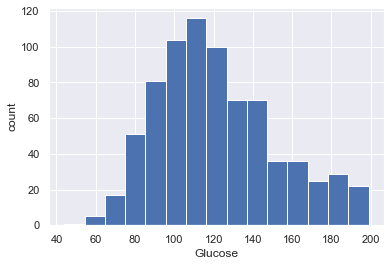

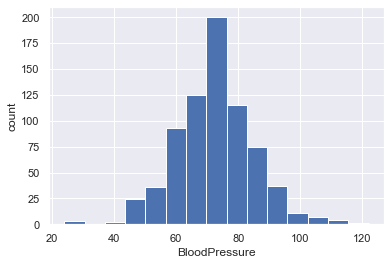

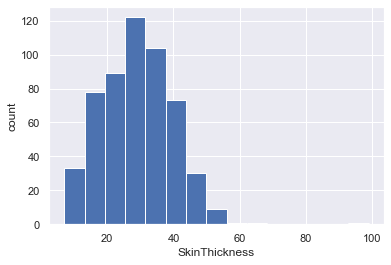

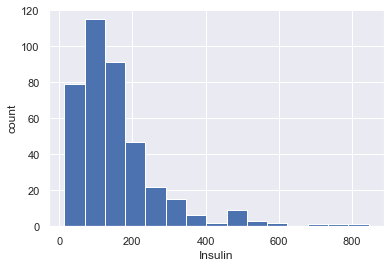

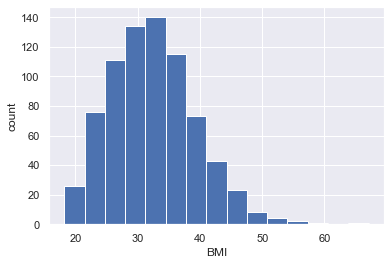

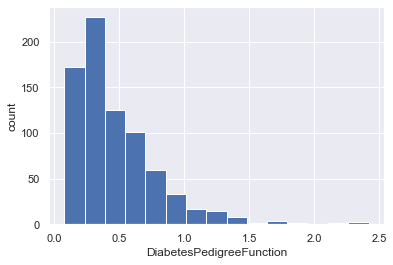

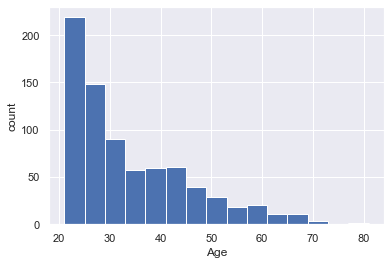

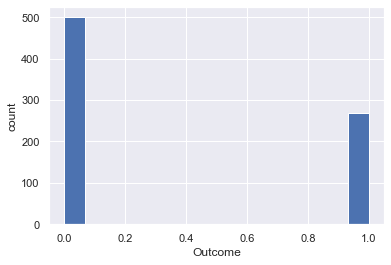

[[(array([246., 103.,  75.,  68.,  57.,  50.,  45.,  66.,  24.,  11.,   9.,
           10.,   2.,   1.,   1.]),
   array([ 0.        ,  1.13333333,  2.26666667,  3.4       ,  4.53333333,
           5.66666667,  6.8       ,  7.93333333,  9.06666667, 10.2       ,
          11.33333333, 12.46666667, 13.6       , 14.73333333, 15.86666667,
          17.        ]),
   <BarContainer object of 15 artists>),
  Text(0.5, 17.200000000000003, 'Pregnancies'),
  Text(17.200000000000003, 0.5, 'count'),
  None],
 [(array([  1.,   5.,  17.,  51.,  81., 104., 116., 100.,  70.,  70.,  36.,
           36.,  25.,  29.,  22.]),
   array([ 44.        ,  54.33333333,  64.66666667,  75.        ,
           85.33333333,  95.66666667, 106.        , 116.33333333,
          126.66666667, 137.        , 147.33333333, 157.66666667,
          168.        , 178.33333333, 188.66666667, 199.        ]),
   <BarContainer object of 15 artists>),
  Text(0.5, 17.200000000000003, 'Glucose'),
  Text(17.200000000000003, 0.5, 'co

In [141]:

[[plt.hist(diabetes_data[i],bins=15),plt.xlabel(i), plt.ylabel('count'),plt.show()] for i in diabetes_data]
# list comprehension that plots each columns' histogram

#### Replace the zeros with mean and median values.

In [142]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

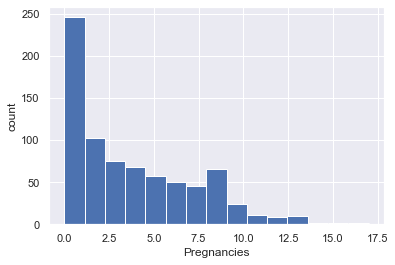

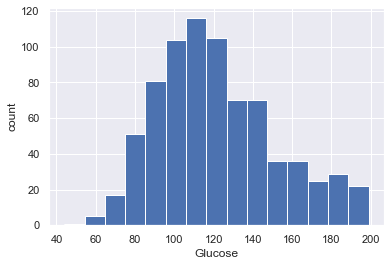

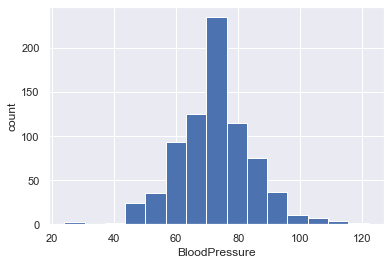

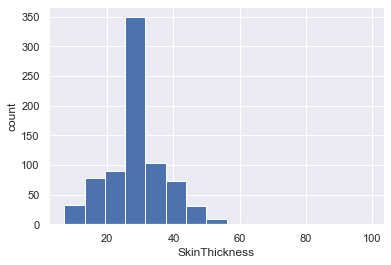

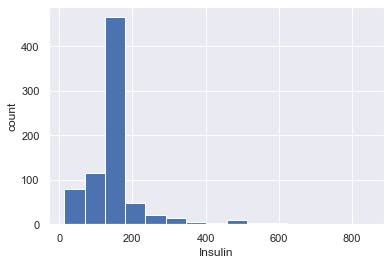

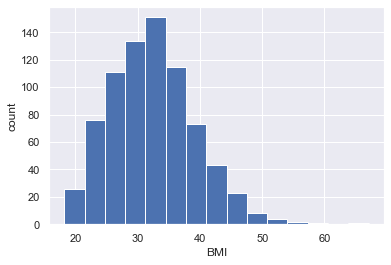

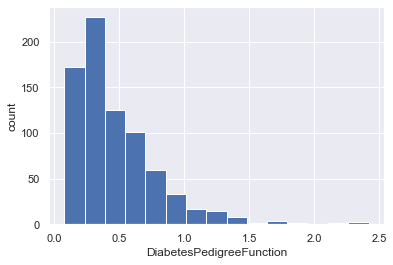

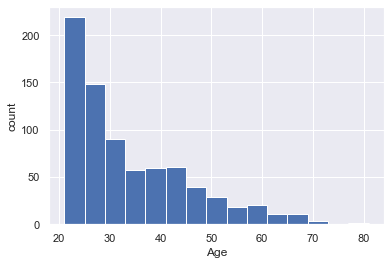

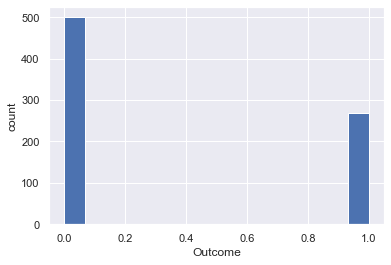

[[(array([246., 103.,  75.,  68.,  57.,  50.,  45.,  66.,  24.,  11.,   9.,
           10.,   2.,   1.,   1.]),
   array([ 0.        ,  1.13333333,  2.26666667,  3.4       ,  4.53333333,
           5.66666667,  6.8       ,  7.93333333,  9.06666667, 10.2       ,
          11.33333333, 12.46666667, 13.6       , 14.73333333, 15.86666667,
          17.        ]),
   <BarContainer object of 15 artists>),
  Text(0.5, 17.200000000000003, 'Pregnancies'),
  Text(17.200000000000003, 0.5, 'count'),
  None],
 [(array([  1.,   5.,  17.,  51.,  81., 104., 116., 105.,  70.,  70.,  36.,
           36.,  25.,  29.,  22.]),
   array([ 44.        ,  54.33333333,  64.66666667,  75.        ,
           85.33333333,  95.66666667, 106.        , 116.33333333,
          126.66666667, 137.        , 147.33333333, 157.66666667,
          168.        , 178.33333333, 188.66666667, 199.        ]),
   <BarContainer object of 15 artists>),
  Text(0.5, 17.200000000000003, 'Glucose'),
  Text(17.200000000000003, 0.5, 'co

In [143]:
[[plt.hist(diabetes_data[i],bins=15),plt.xlabel(i), plt.ylabel('count'),plt.show()] for i in diabetes_data]
# list comprehension that plots each columns' histogram

#### Plot the correlation matrix heatmap

Correlation between various features


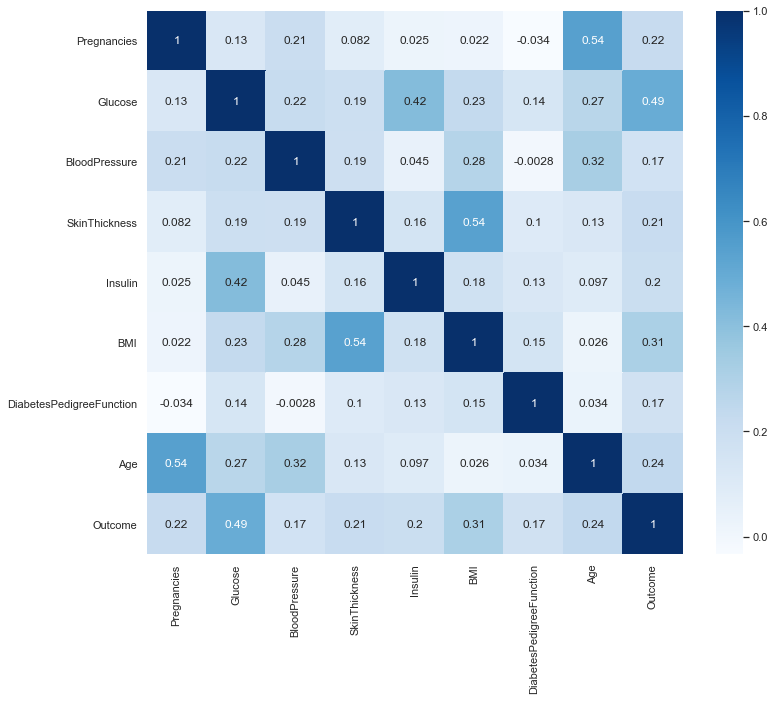

In [144]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [145]:
y = diabetes_data['Outcome']
X = diabetes_data.drop(columns='Outcome')

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, stratify = y)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [147]:
scale = StandardScaler()
scalefit = scale.fit(X_train)
sX_train = pd.DataFrame(scalefit.transform(X_train),columns=X_train.columns)
sX_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.931383,2.085753,0.965518,0.498532,-0.163932,0.428910,-0.374779,0.632129
1,0.632606,-1.222867,0.472716,0.013767,-0.163932,-0.210550,-0.294168,0.716992
2,-0.562502,-0.521038,-0.677154,0.740915,-0.239259,-0.314648,2.745172,0.038086
3,-0.562502,-0.721561,-1.498489,-0.107425,-0.415020,0.770947,0.052162,-0.810548
4,0.333829,-0.587879,0.144182,0.013767,-0.163932,-0.567458,-0.977870,1.226172


In [148]:
sX_test = pd.DataFrame(scalefit.transform(X_test),columns=X_test.columns)
sX_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.263725,0.281051,0.472716,-0.713382,-0.741435,-0.626943,-0.470318,0.038086
1,0.035052,-0.420777,-0.677154,1.831637,-0.490347,0.324812,1.267301,-0.640821
2,2.126492,0.715516,1.786853,0.498532,0.099711,0.592493,-0.676324,1.480762
3,0.035052,0.748937,0.801250,0.377341,-0.163932,0.875045,0.219355,0.292676
4,1.230161,-0.554459,2.279654,0.862106,-0.163932,1.588861,-0.721108,0.971582


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [149]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,11):

    knn = KNeighborsClassifier(i)
    knn.fit(sX_train,y_train)
    
    train_scores.append(knn.score(sX_train,y_train))
    test_scores.append(knn.score(sX_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [150]:
for i in range(0,10):

    print("For k = ",i+1)
    print("Training: ",train_scores[i])
    print("Testing: ", test_scores[i])
    print("________________________")
    

For k =  1
Training:  1.0
Testing:  0.7186147186147186
________________________
For k =  2
Training:  0.8435754189944135
Testing:  0.7229437229437229
________________________
For k =  3
Training:  0.8621973929236499
Testing:  0.7402597402597403
________________________
For k =  4
Training:  0.8286778398510242
Testing:  0.7402597402597403
________________________
For k =  5
Training:  0.8342644320297952
Testing:  0.7445887445887446
________________________
For k =  6
Training:  0.8100558659217877
Testing:  0.7402597402597403
________________________
For k =  7
Training:  0.8063314711359404
Testing:  0.7359307359307359
________________________
For k =  8
Training:  0.8063314711359404
Testing:  0.7489177489177489
________________________
For k =  9
Training:  0.8007448789571695
Testing:  0.7445887445887446
________________________
For k =  10
Training:  0.8100558659217877
Testing:  0.7359307359307359
________________________


In [151]:
df = pd.DataFrame(zip(numlist,train_scores,test_scores), columns=['k','train','test'])
df

,k,train,test
0,1,1.000000,0.718615
1,2,0.843575,0.722944
2,3,0.862197,0.740260
3,4,0.828678,0.740260
4,5,0.834264,0.744589
5,6,0.810056,0.740260
6,7,0.806331,0.735931
7,8,0.806331,0.748918
8,9,0.800745,0.744589
9,10,0.810056,0.735931


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [152]:
max_train = df['k'][df['train']==max(df['train'])]
max_train

0    1
Name: k, dtype: int64

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [153]:
max_test = df['k'][df['test']==max(df['test'])]
max_test

7    8
Name: k, dtype: int64

Plot the train and test model performance by number of neighbors.

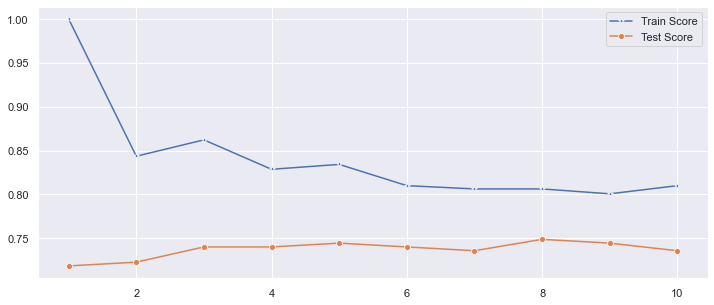

In [154]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,11),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,11),y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [155]:
knn = KNeighborsClassifier(8)
knn.fit(sX_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [156]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(sX_test)
cm = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

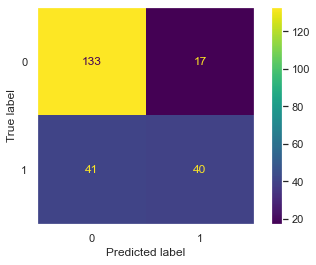

In [162]:

cmd = ConfusionMatrixDisplay(confusion_matrix = cm)

cmd.plot()
plt.grid(None)
plt.show()

**<font color='teal'> Print the classification report </font>**

In [163]:
print("Classification Report for Test Data")
print(classification_report(y_test, y_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.70      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [166]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(sX_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [167]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7561266874350987
Best Parameters: {'n_neighbors': 9}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

Except that my model is telling me k = 9 is the best performing parameter.

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [168]:
param_grid = {'n_estimators':np.arange(1,200,20),'max_depth':[2,5,8,10]}
rf = RandomForestClassifier()
rf_cv= GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(sX_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8, 10],
                         'n_estimators': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181])})

In [169]:
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.7709588092765663
Best Parameters: {'max_depth': 5, 'n_estimators': 121}


In [171]:
rf = RandomForestClassifier(max_depth=5,n_estimators=121)
rf.fit(sX_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=121)

In [174]:
from sklearn.metrics import confusion_matrix
y_predRF = rf.predict(sX_test)
cmRF = confusion_matrix(y_test,y_predRF)

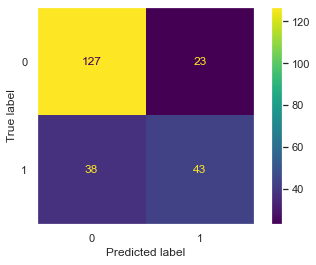

In [175]:
cmdRF = ConfusionMatrixDisplay(confusion_matrix = cmRF)

cmdRF.plot()
plt.grid(None)
plt.show()

In [176]:
print("Classification Report for Test Data")
print(classification_report(y_test, y_predRF))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.65      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



Neither of these models' performances are impressive.